In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

In [14]:
def compute_total(ratio, amounts):
    """
    Computes the total according to the formula:
    total = R_t x_t + R_t R_{t-1} x_{t-1} + ... + R_t R_{t-1} ... R_1 x_1

    Args:
        R (list or array): List of R values [R1, R2, ..., Rt]
        x (list or array): List of x values [x1, x2, ..., xt]

    Returns:
        total (float): Computed total
    """
    time = len(ratio)

    total = 0
    product = 1

    for i in reversed(range(time)):
        product *= ratio[i]
        total += product * amounts[i]

    return total

In [15]:
ratios = np.array([1.08]*20)
amounts = np.array([100000] + [4500]*19)

In [47]:
nyears = 21
initial = 100000
gain = 1.20
yearly_contribution = 10000
record = [initial]
for i in range(1, nyears):
    ratios = np.array([gain]*i)
    amounts = np.array([initial] + [yearly_contribution]*i)
    total = compute_total(ratios, amounts)
    record.append(total)

In [48]:
record = np.array(record) / 1000

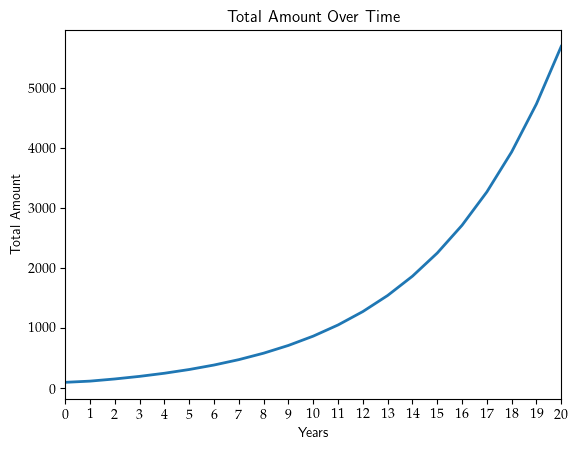

In [49]:
plt.plot(range(nyears), record, lw=2)
plt.title("Total Amount Over Time")
plt.xlabel("Years")
plt.ylabel("Total Amount")
plt.xlim(0, nyears-1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()